In [1]:
# Load and understand the data

import pandas as pd

# Load the dataset
file_path = 'creditcard (1).csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Display basic statistics
print("\nDataset Statistics:")
print(data.describe())

# Display the first few rows
print("\nFirst few rows of the dataset:")
print(data.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

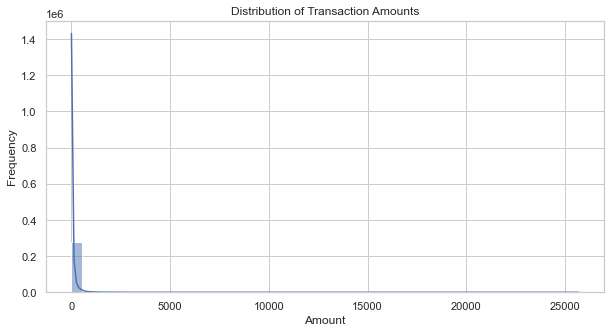

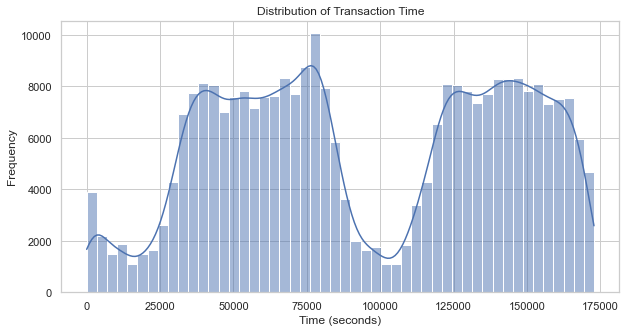

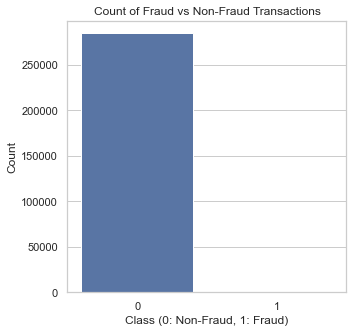

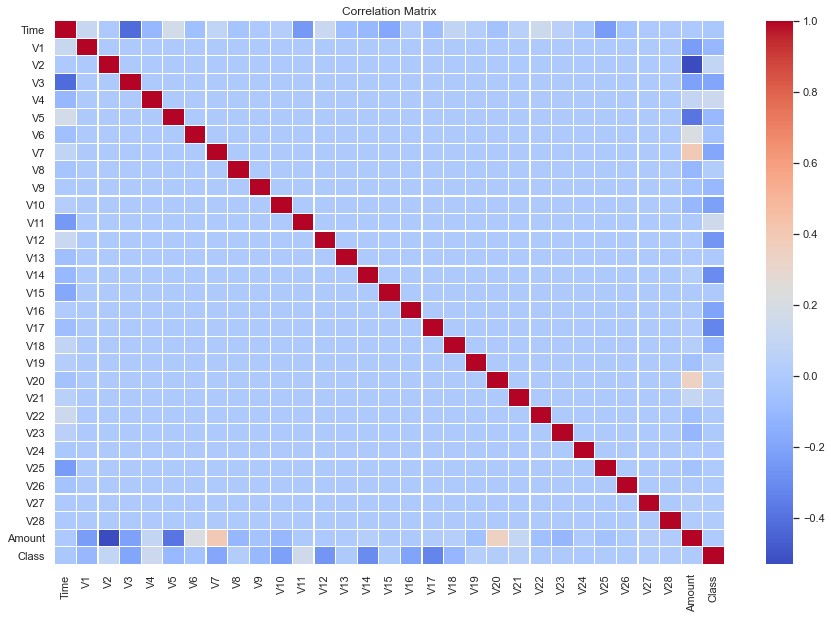

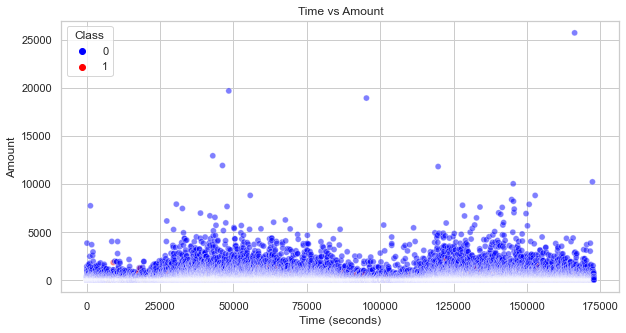

KeyboardInterrupt: 

In [2]:
 # Exploratory Data Analysis (EDA)
    
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'creditcard (1).csv'
data = pd.read_csv(file_path)

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the distribution of the 'Amount' feature
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Amount', bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of the 'Time' feature
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Time', bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

# Plot the count of fraud vs non-fraud transactions
plt.figure(figsize=(5, 5))
sns.countplot(data=data, x='Class')
plt.title('Count of Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

# Time vs Amount scatter plot colored by Class
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Time', y='Amount', hue='Class', palette={0: 'blue', 1: 'red'}, alpha=0.5)
plt.title('Time vs Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Amount')
plt.show()

# Pair plot of selected features
selected_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount', 'Class']
sns.pairplot(data[selected_features], hue='Class', palette={0: 'blue', 1: 'red'})
plt.show()




In [3]:
#Troubleshooting Data Issues
#Check for Missing or Infinite Values:
import numpy as np
# Check for missing values
missing_values = data[selected_features].isnull().sum()

# Check for infinite values
infinite_values = data[selected_features].applymap(lambda x: not np.isfinite(x)).sum()

missing_values, infinite_values


(V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 Amount    0
 Class     0
 dtype: int64,
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 Amount    0
 Class     0
 dtype: int64)

In [4]:
#Ensure Data Types are Correct:
# Check data types

data_types = data[selected_features].dtypes
data_types


V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
Amount    float64
Class       int64
dtype: object

In [5]:
# step3: Data Cleaning
# Check the datatypes again to confirm
print(data.dtypes)

# Ensure the correct datatype for 'Time' (if not already correct)
# The 'Time' feature should be numeric, so no change is needed.

# Standardize the 'Amount' feature using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Confirm changes
print(data.head())


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.87

In [6]:
!pip install --user imbalanced-learn


In [7]:
from imblearn.over_sampling import SMOTE

# Separate the features and the target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(y_resampled.value_counts())

0    284315
1    284315
Name: Class, dtype: int64


In [8]:
#step 4: Feature Engineering
from sklearn.preprocessing import StandardScaler

# Standardize the 'Time' feature using StandardScaler
scaler = StandardScaler()
data['Time'] = scaler.fit_transform(data[['Time']])

# Confirm changes
print(data.head())


    

       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

In [ ]:
#step 5 : Model Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Model Evaluation")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Train a Random Forest Classifier model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest Classifier model
print("Random Forest Classifier Model Evaluation")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Logistic Regression Model Evaluation
[[83560  1589]
 [ 2990 82450]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     85149
           1       0.98      0.97      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



In [ ]:
#step 6:Model Validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the Random Forest model
rf_cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5)

print("Random Forest Classifier Cross-Validation Scores:", rf_cv_scores)
print("Mean Cross-Validation Score:", rf_cv_scores.mean())


In [ ]:
#step 7: Model Deployment Plan
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')


In [ ]:
#Flask API
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the saved model
model = joblib.load('random_forest_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([data['features']])
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)
